In [40]:
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2
import numpy as np

from src.GridWorldMDP.utils import draw_path, generate_demonstrations, init_grid_world
from src.deepmaxent_irl_gridword import run_deepmaxent_irl
from src.maxent_irl_gridworld import run_maxent_irl
from src.img_utils import Visualizer, get_evd, draw_evd
from src.argument_parser import get_parser, parse_args_str

PARSER = get_parser()

## Maxent

In [42]:
np.random.seed(1)
BASIC_ARGS = """
--exp_name test
--height 6
--width 6
"""
args = parse_args_str(PARSER, BASIC_ARGS)
print(args.exp_name)
coor_rates = [
    ((args.height-2, args.width-2), 1.0), 
    ((0, args.width-1), 0.5), 
    ((1, 1), 0.5)
]
init_start_pos = np.random.randint(0, args.height, size=(args.n_query, 2)).tolist()
print('start positions: ', init_start_pos)

test
start positions:  [[5, 3]]


In [ ]:
MAXENT_ARGS = """
--exp_name maxent_rand
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 10
--l_traj 6
--learning_rate 0.1
--n_iters 100
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--active
"""
args = parse_args_str(PARSER, MAXENT_ARGS)
print(args.exp_name)

history_maxent_active = run_maxent_irl(args, coor_rates, init_start_pos=init_start_pos)

In [ ]:
visualizer = Visualizer(history_maxent_active, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)

---

## Deep Maxent

In [43]:
init_start_pos

[[5, 3]]

In [44]:
DEEP_MAXENT_ACTIVE_ARGS = """
--exp_name deepmaxent_active
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 10
--l_traj 6
--learning_rate 0.01
--n_iters 20
--alpha 0.5
--n_query 1
--r_max 1
--error 0.01
--grad_clip 50.0
--weight_decay 10.0
--hiddens 512 256
--device cuda
--active
"""

# becareful of learning rate will cause nan
args = parse_args_str(PARSER, DEEP_MAXENT_ACTIVE_ARGS)
print(args.exp_name)
history_deepmaxent_active = run_deepmaxent_irl(args, coor_rates, init_start_pos=init_start_pos)

[INFO - n_trajs:10] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:10--
[[0.3225 0.369  0.7518 0.758  0.7134 0.3385]
 [0.5143 0.4136 0.2031 0.5531 0.     0.4063]
 [0.6602 0.6515 0.3811 0.596  0.3643 0.5877]
 [0.0133 0.3754 0.5091 0.76   0.5624 0.5052]
 [0.5843 0.3191 0.1966 0.4292 1.     0.6216]
 [0.502  0.3086 0.2683 0.4464 0.4111 0.4499]]
[INFO - n_trajs:10] Policy evaluation


In [45]:
history_deepmaxent_active[9]['policy'].argmax(axis=1).reshape(6, 6, order='F')

array([[2, 2, 0, 2, 2, 2],
       [0, 2, 2, 2, 2, 2],
       [0, 0, 2, 2, 2, 1],
       [0, 0, 0, 0, 1, 1],
       [0, 0, 3, 3, 3, 1],
       [3, 3, 3, 3, 3, 3]], dtype=int64)

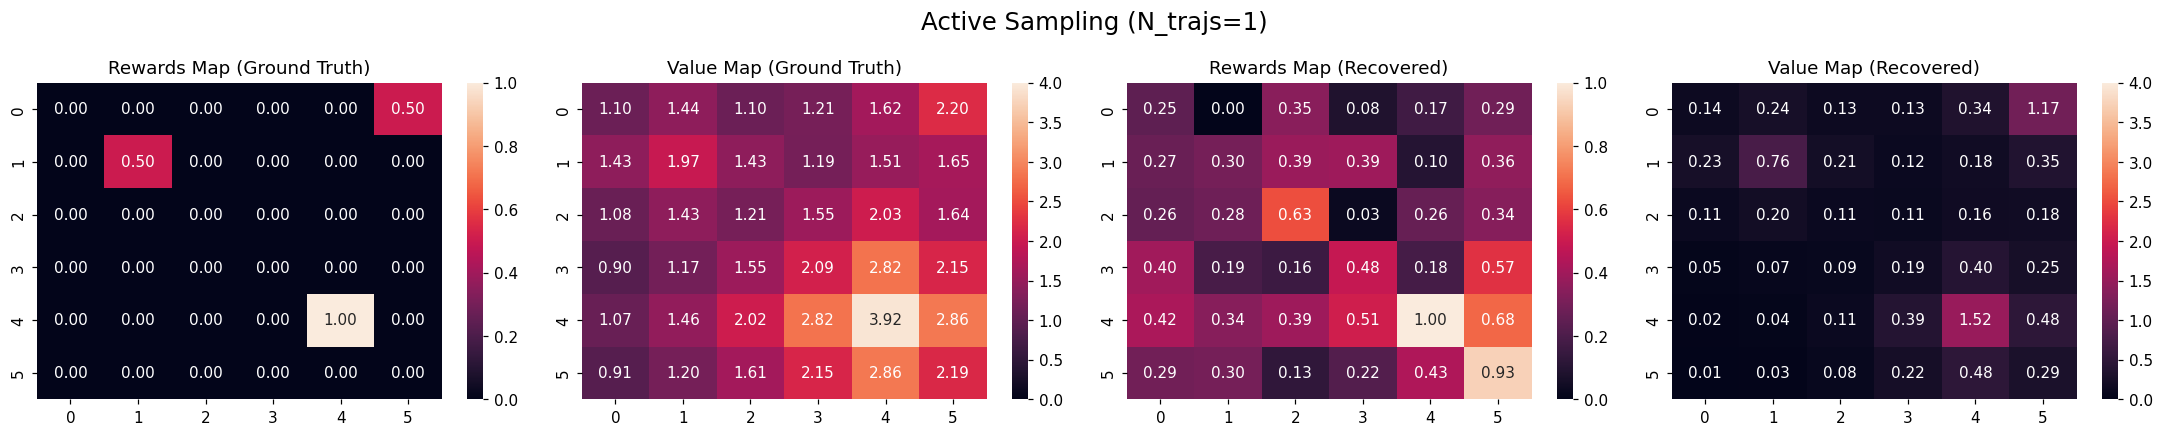

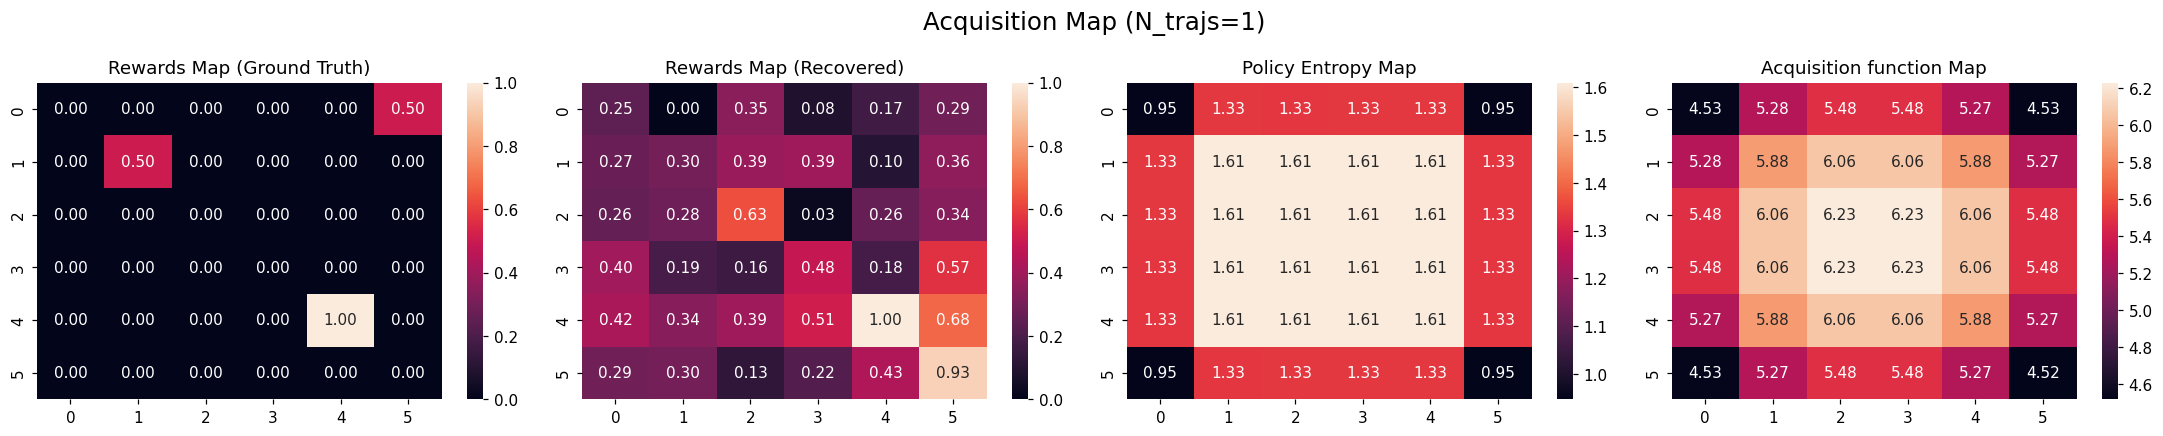

In [46]:
visualizer = Visualizer(history_deepmaxent_active, file_path=None)
search_idx = 1
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)